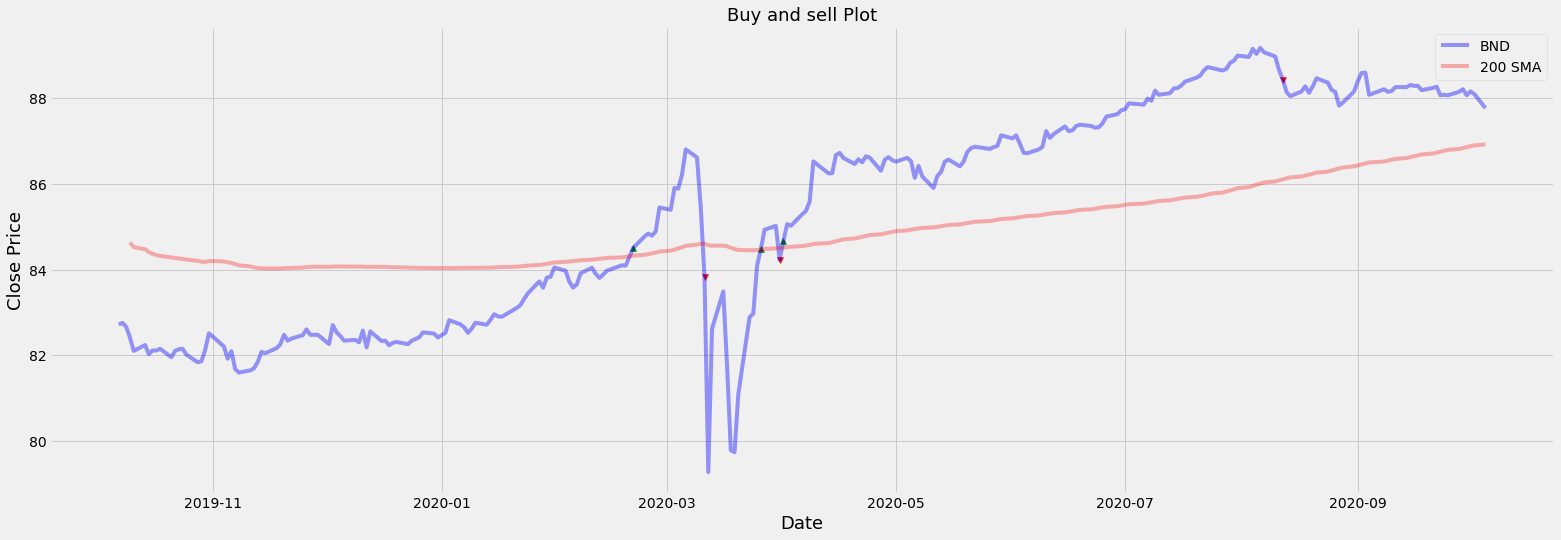

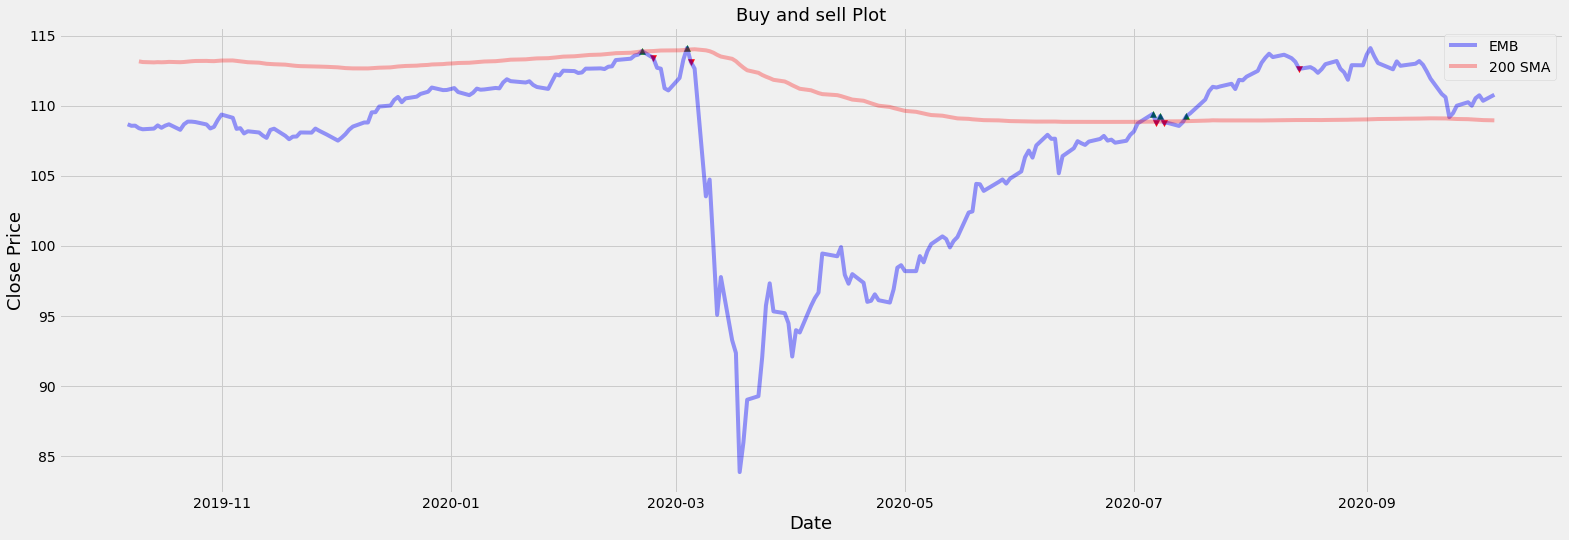

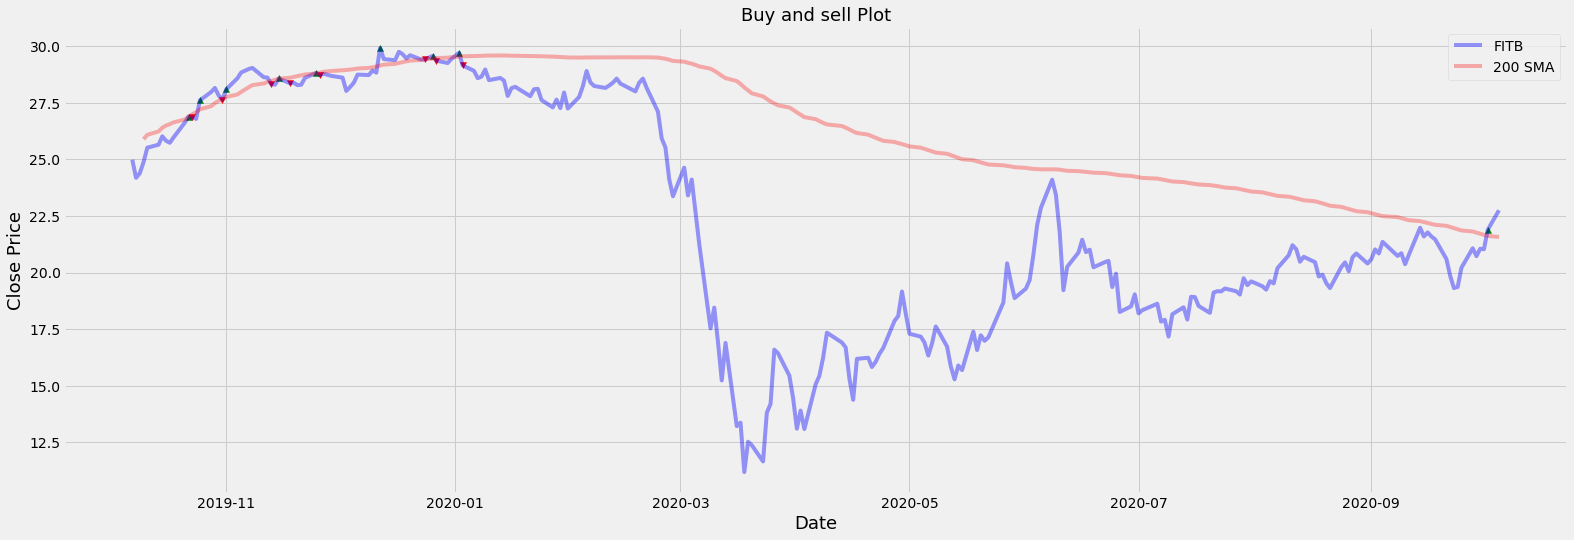

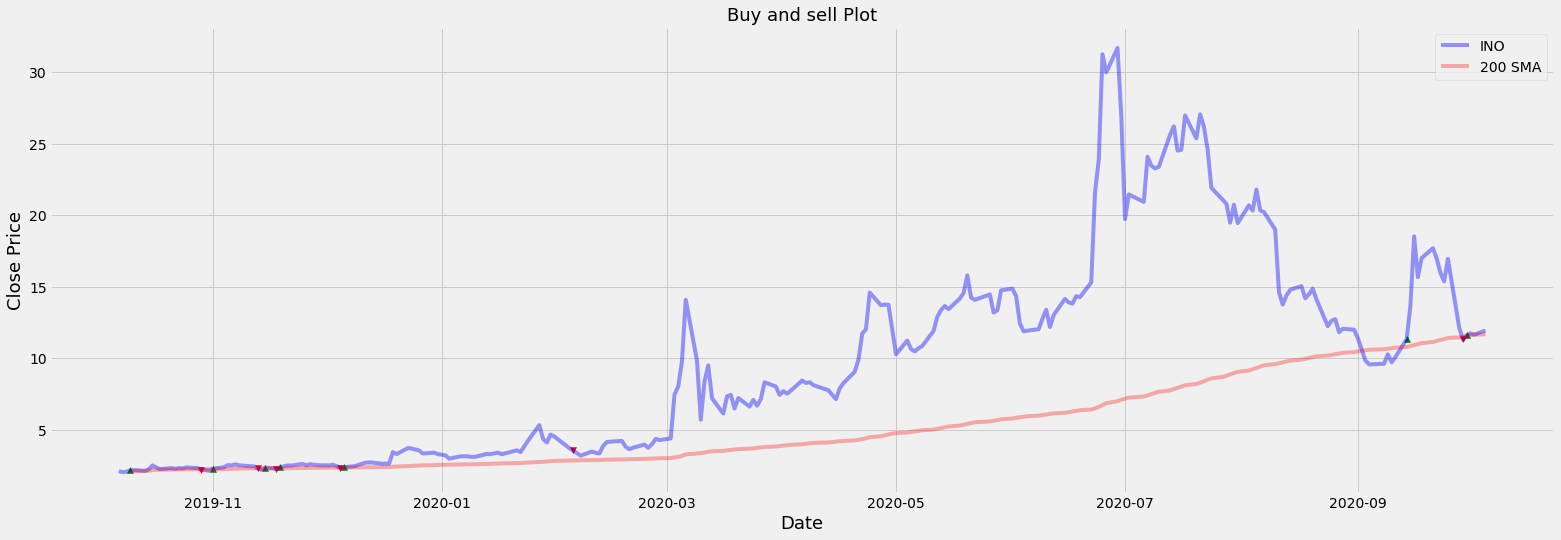

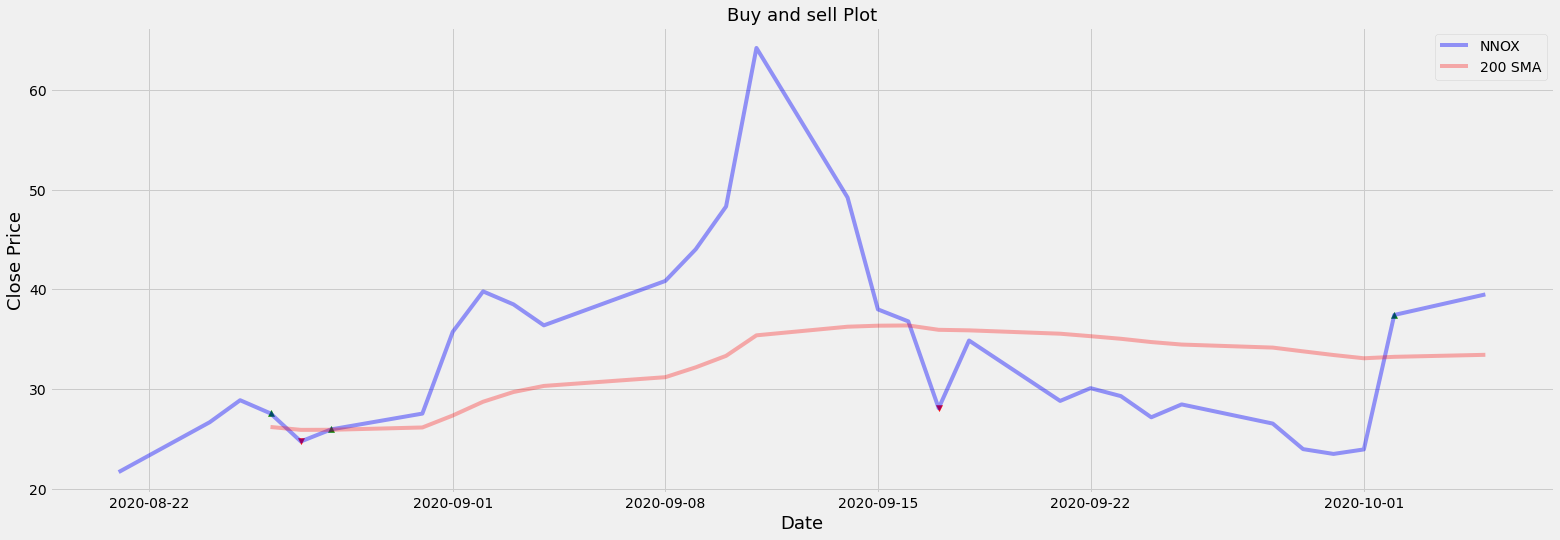

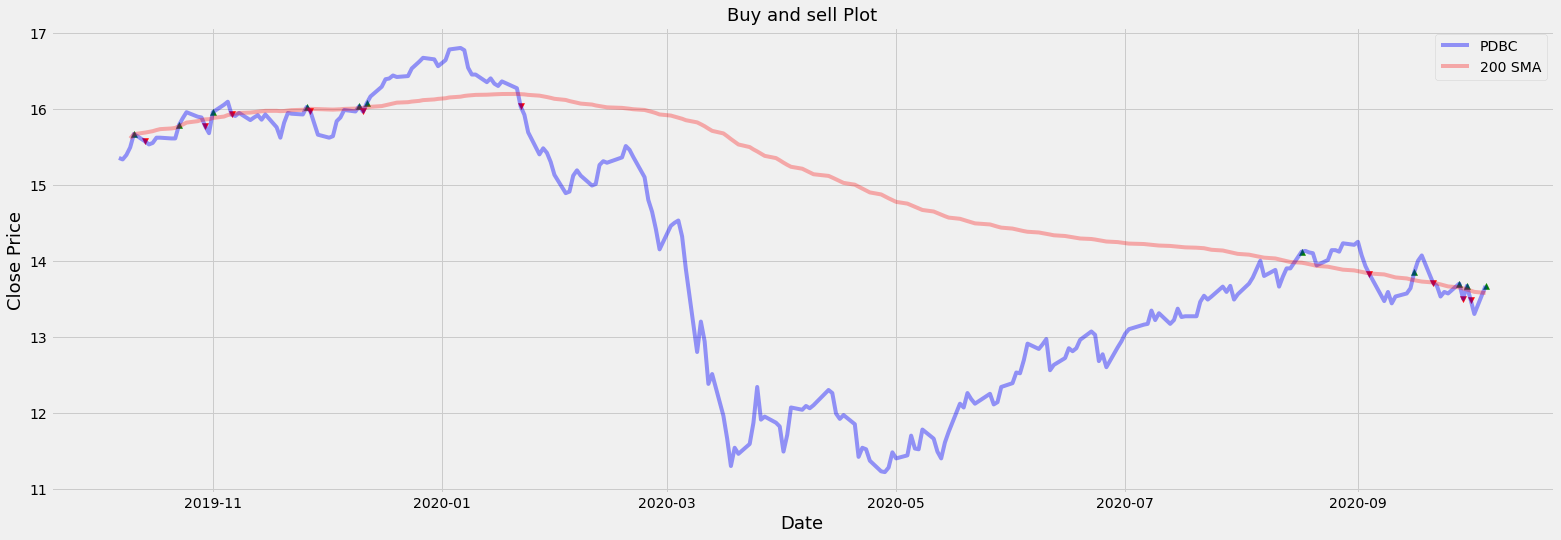

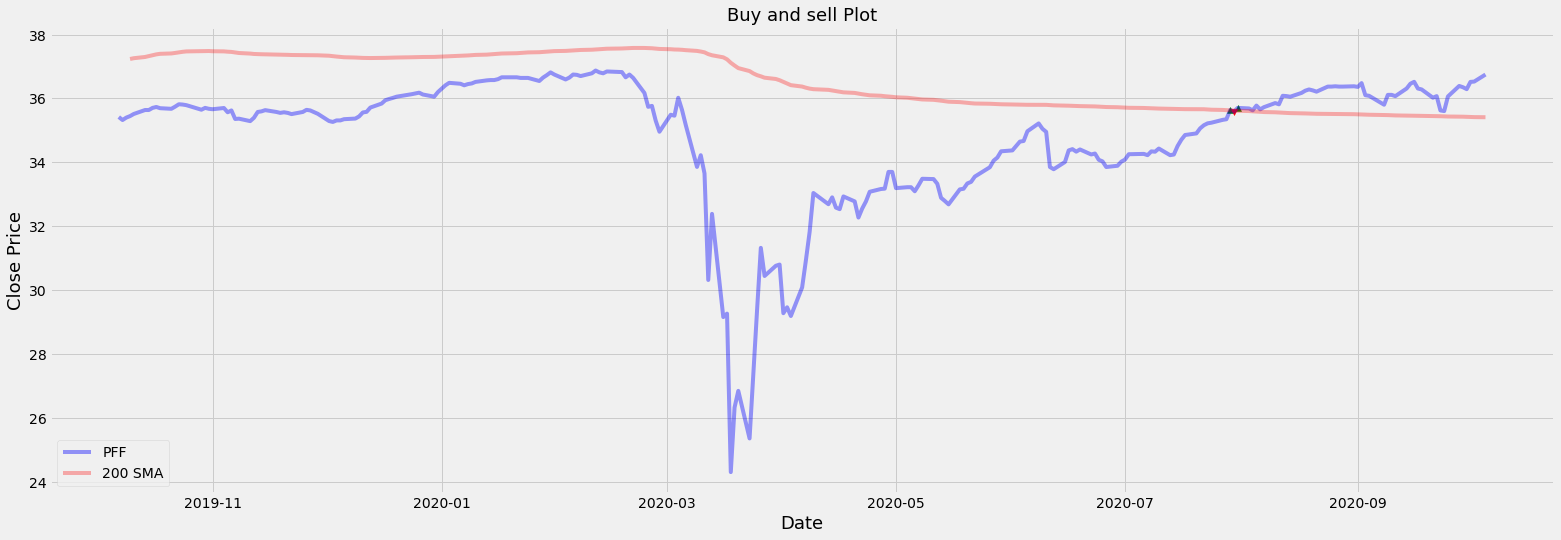

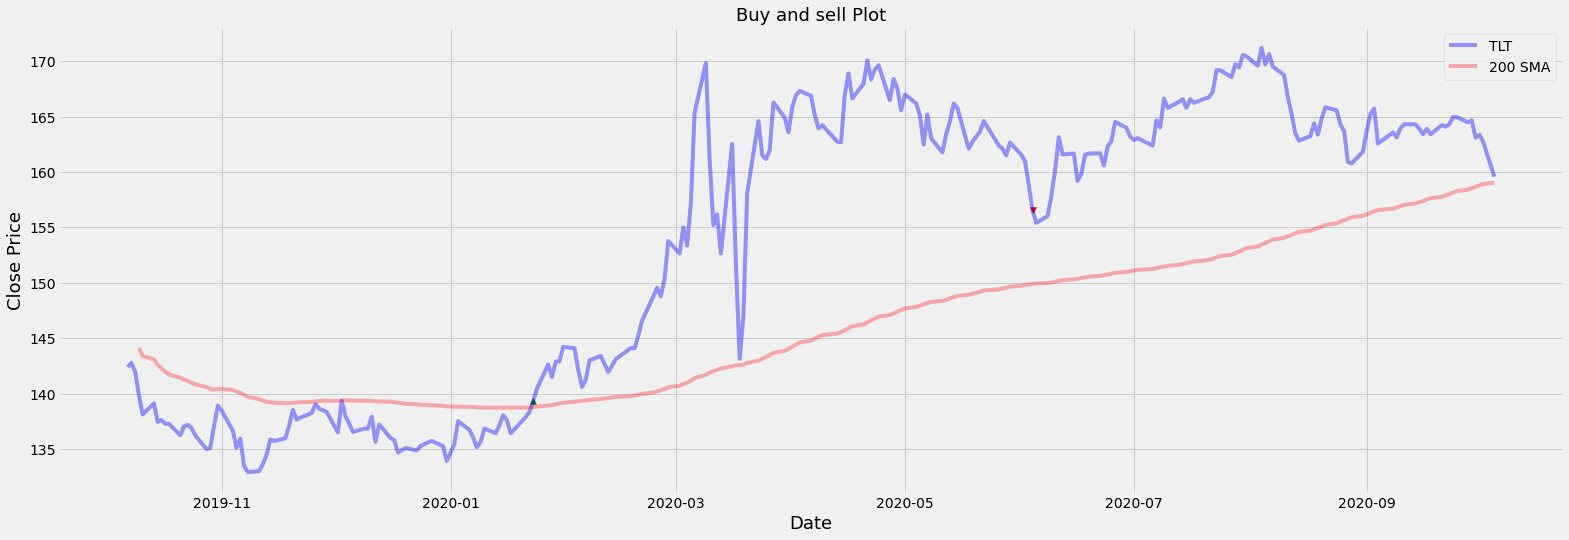

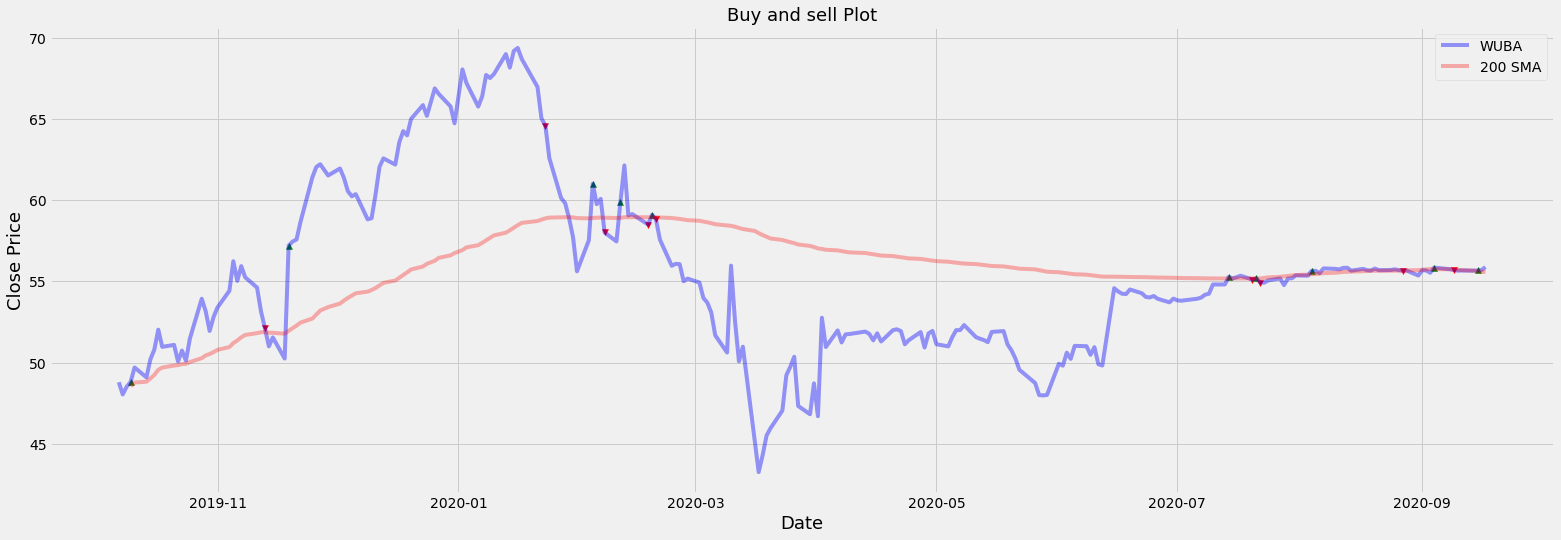

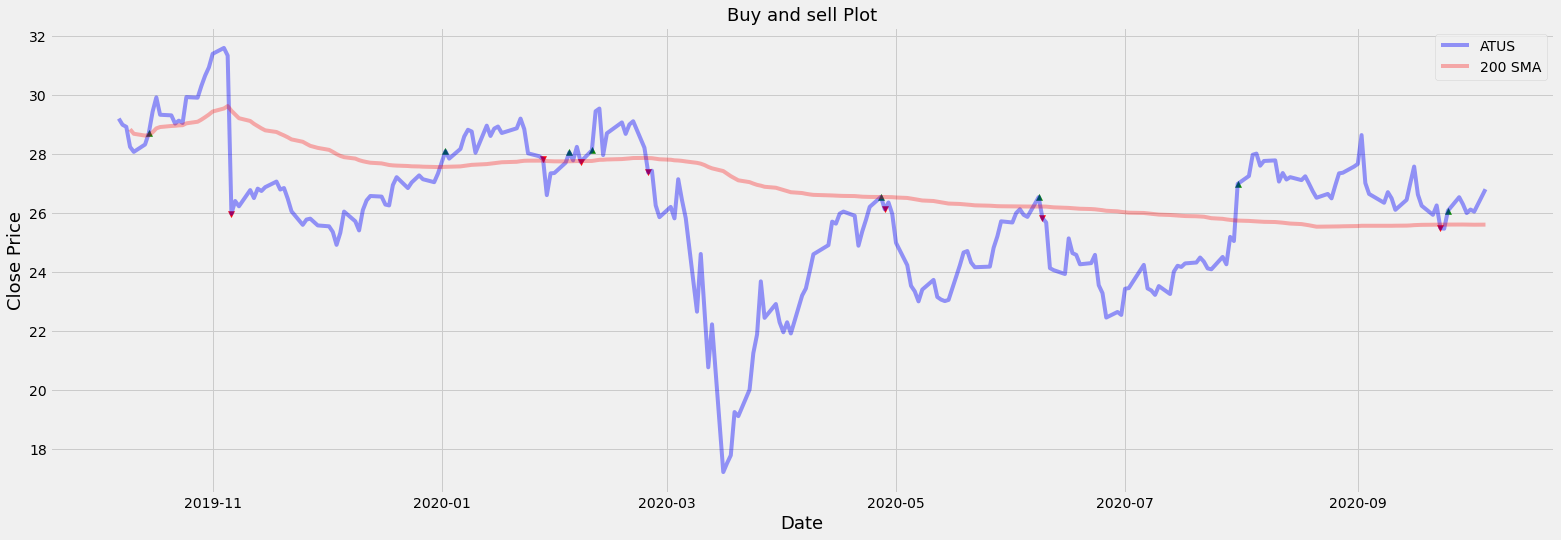

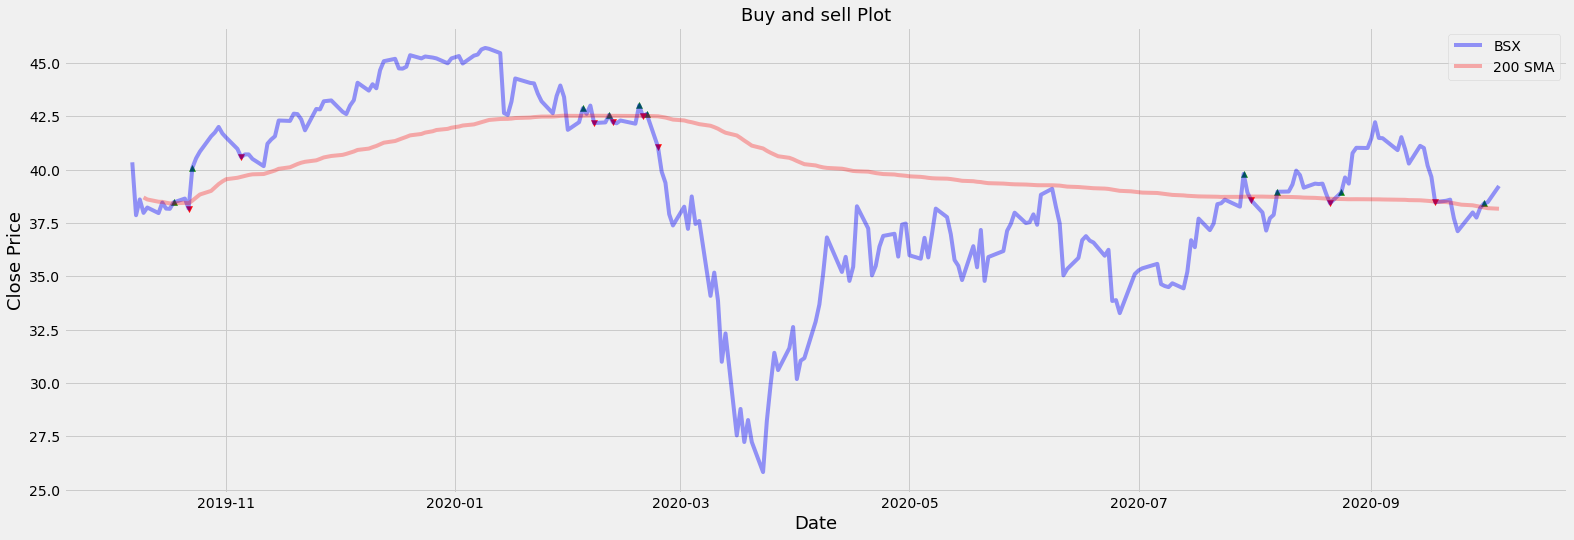

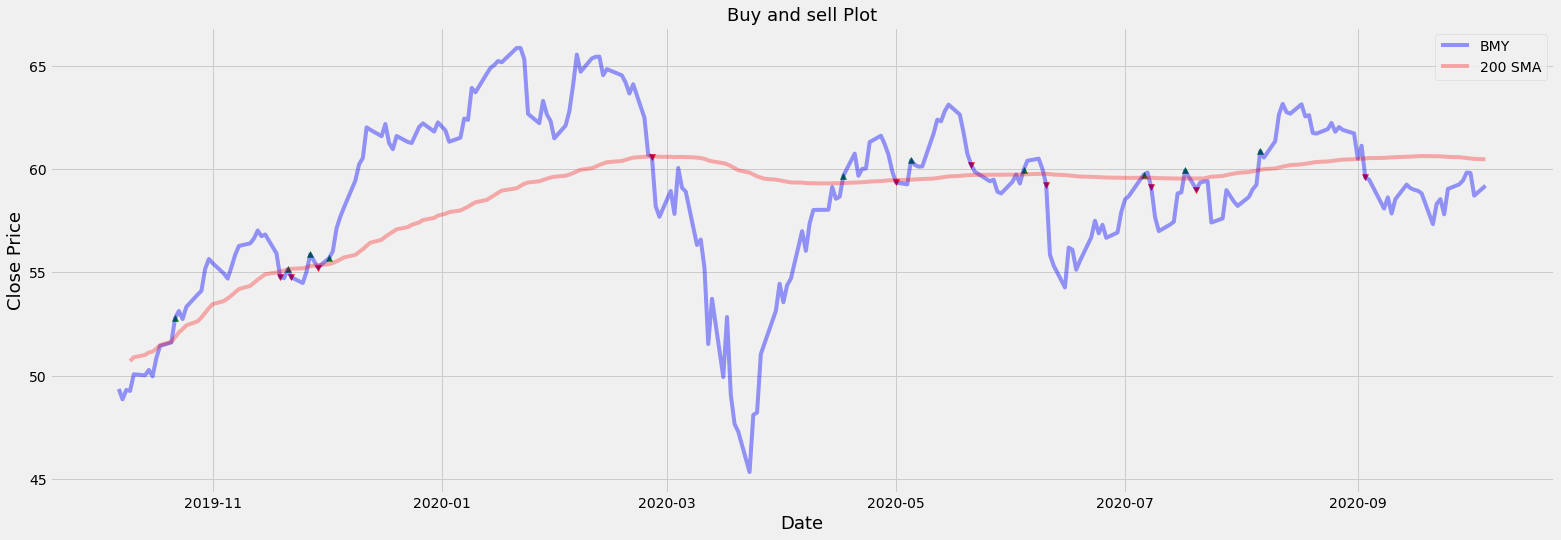

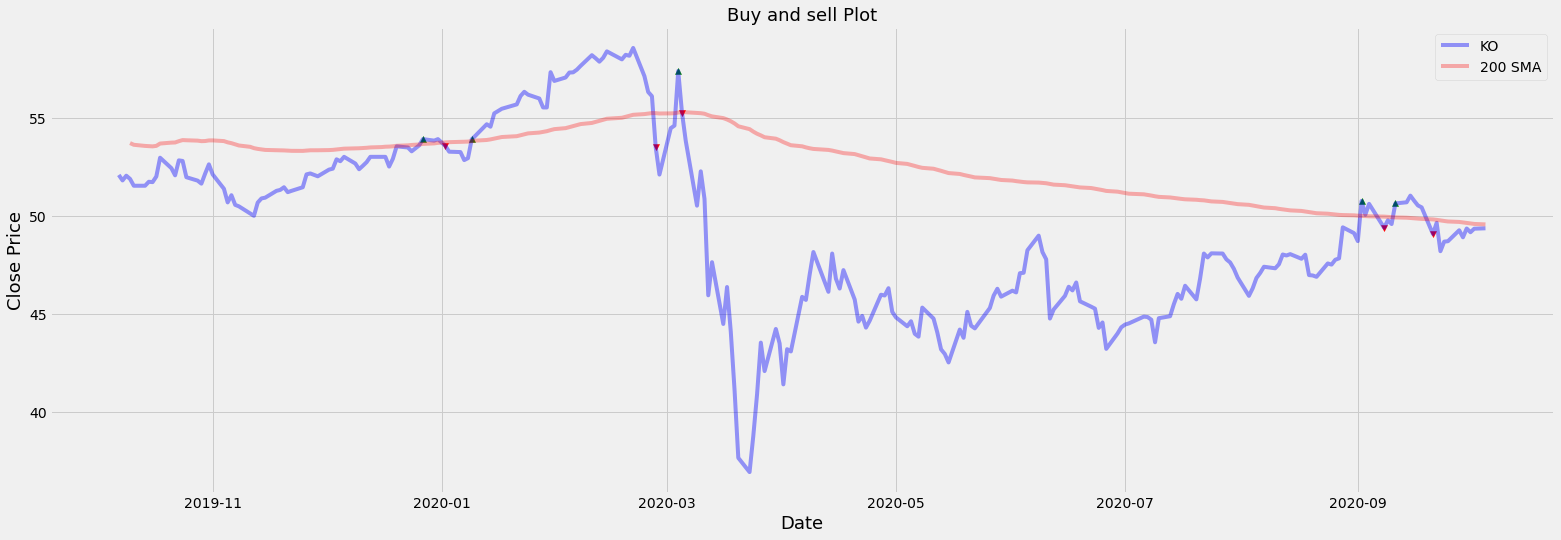

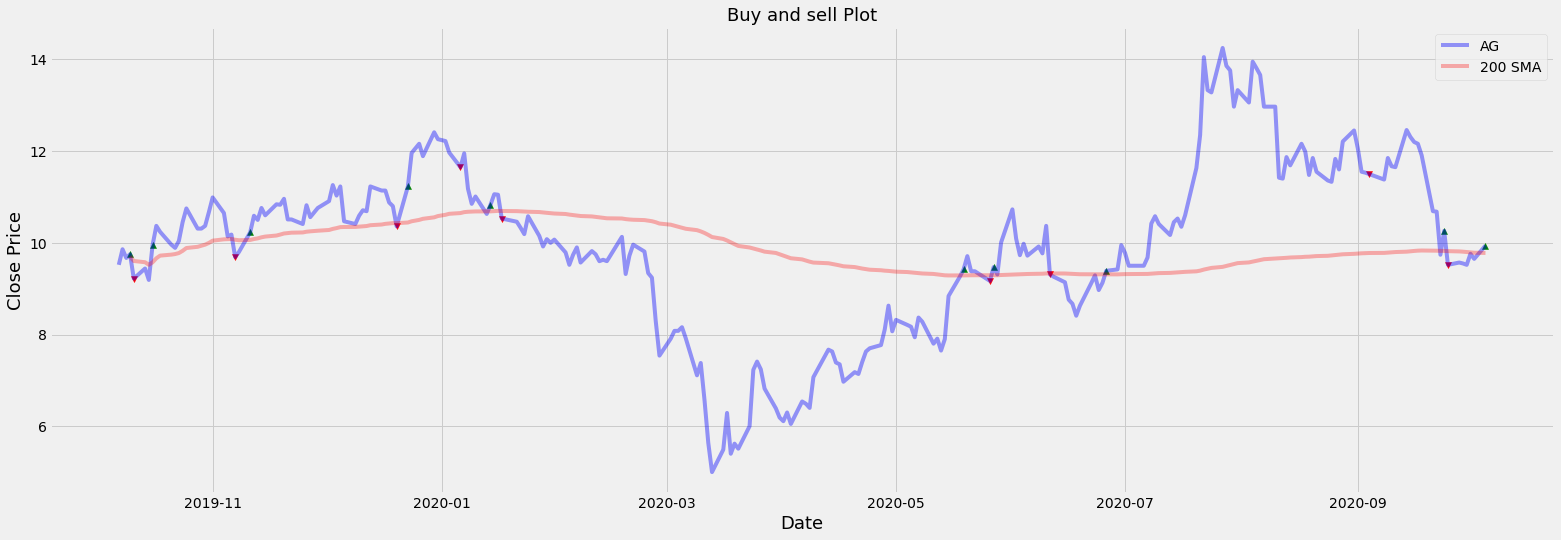

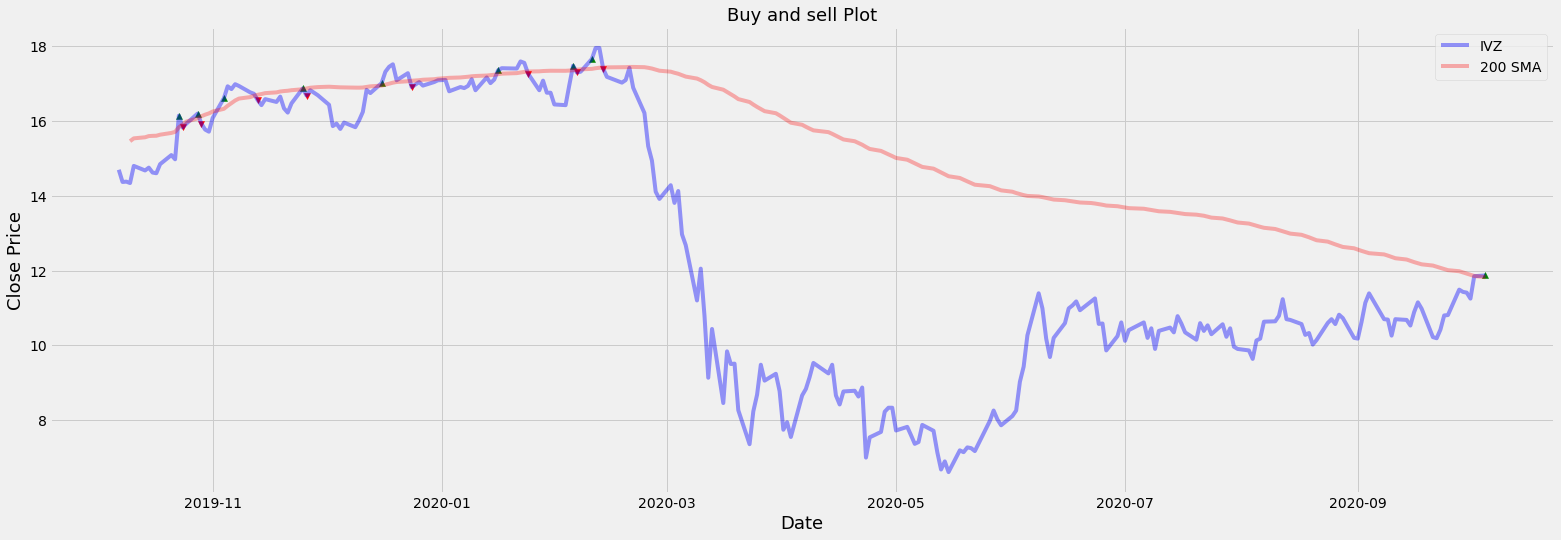

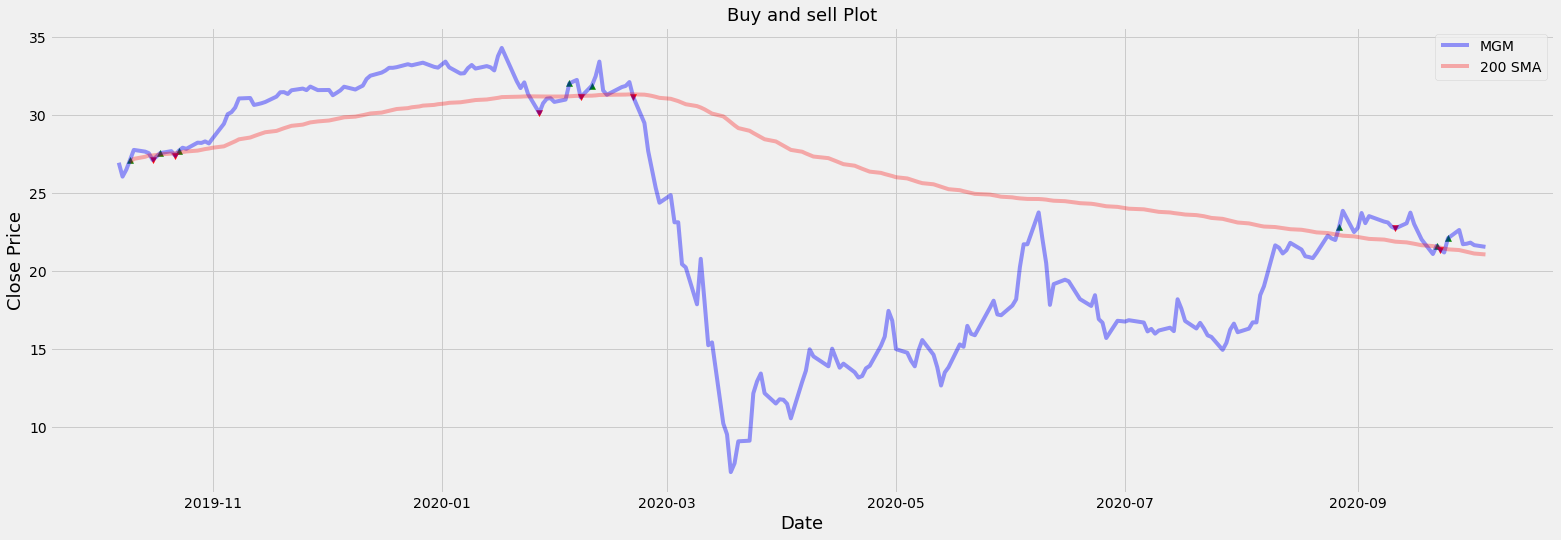

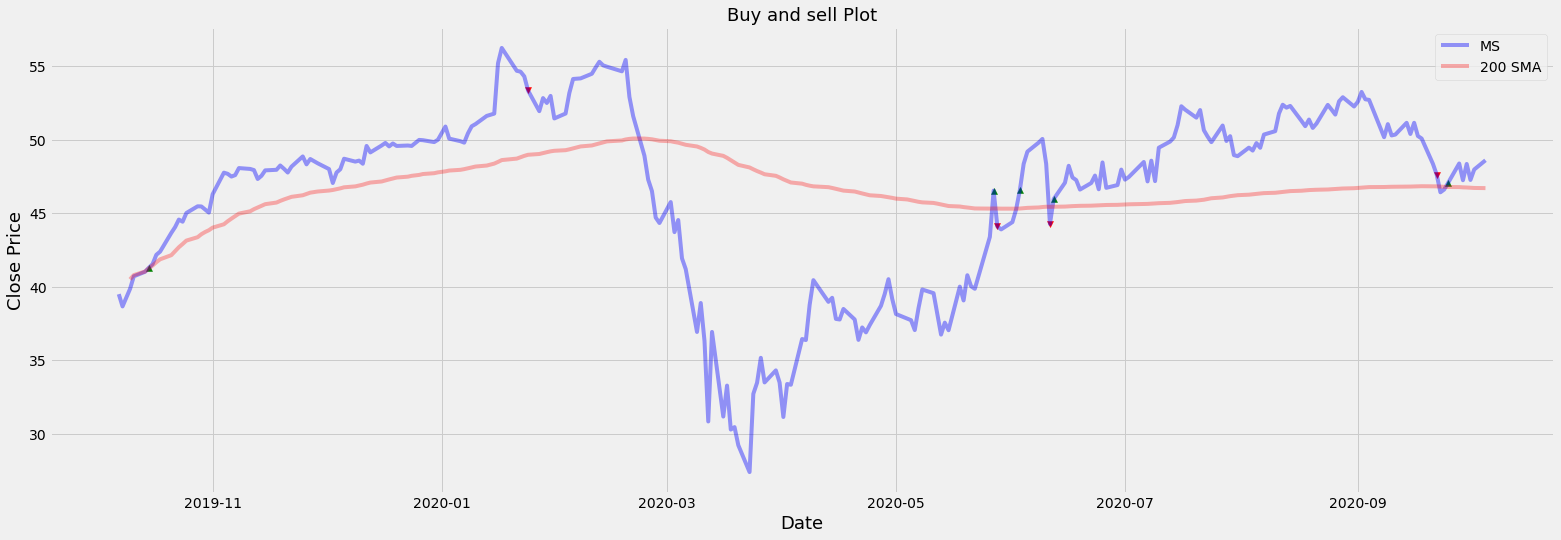

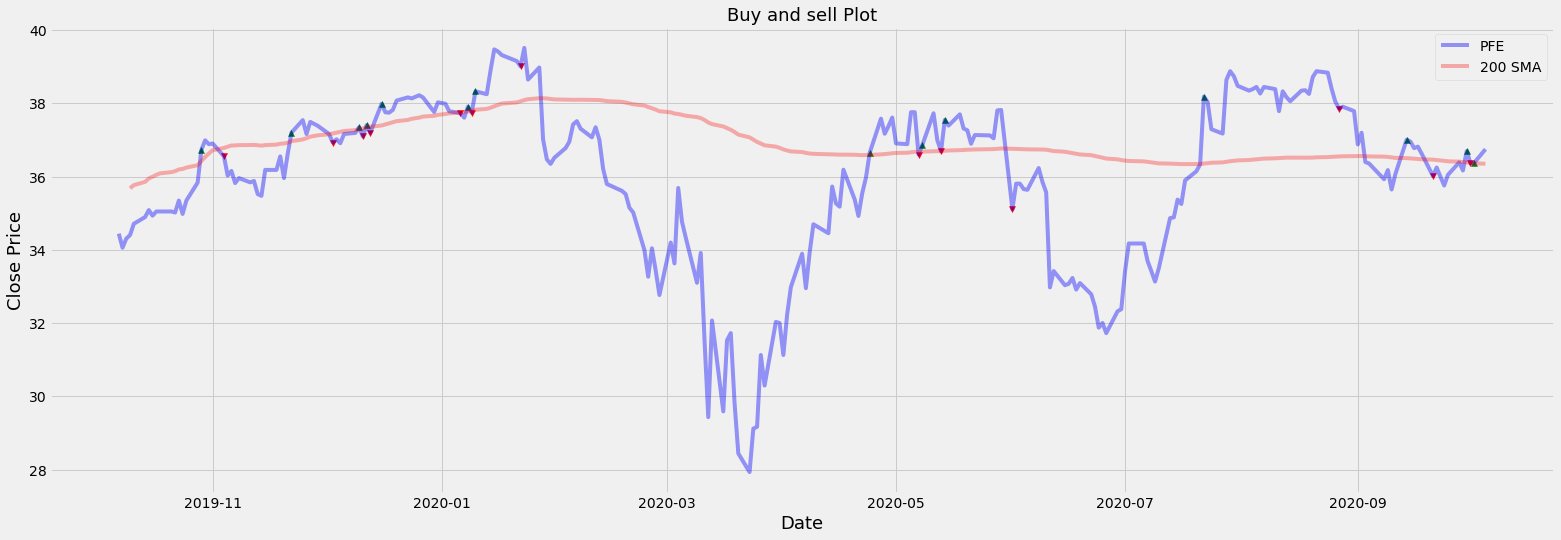

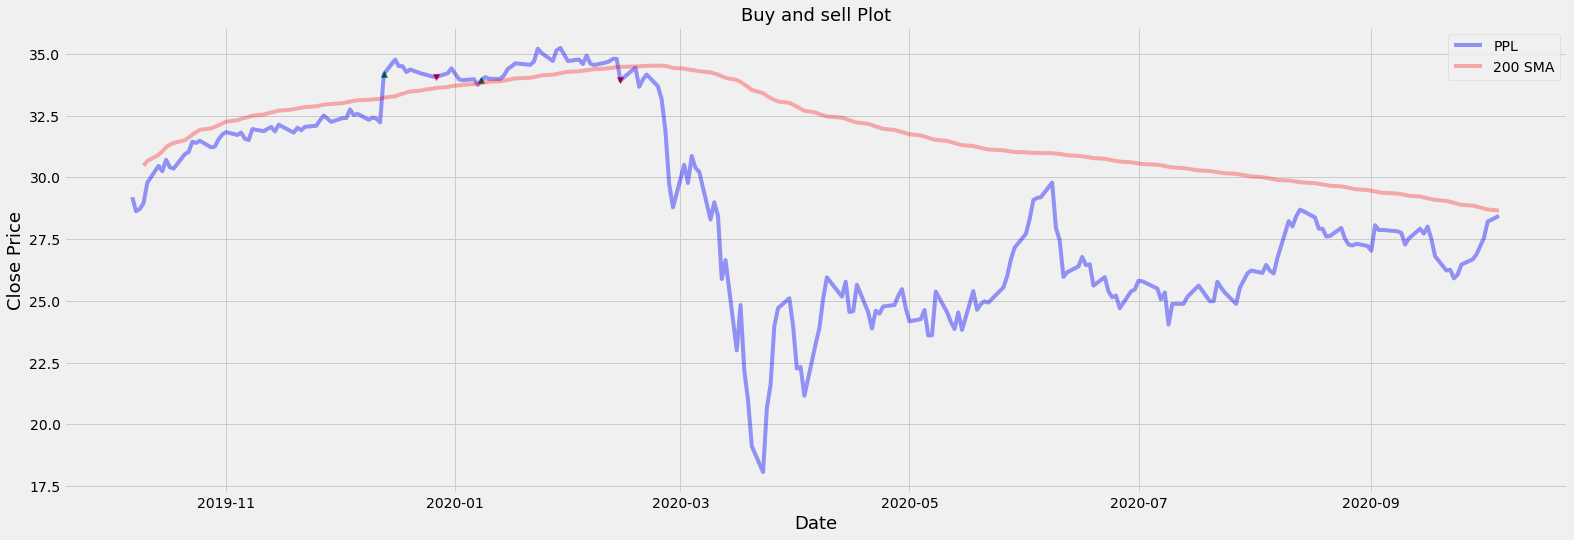

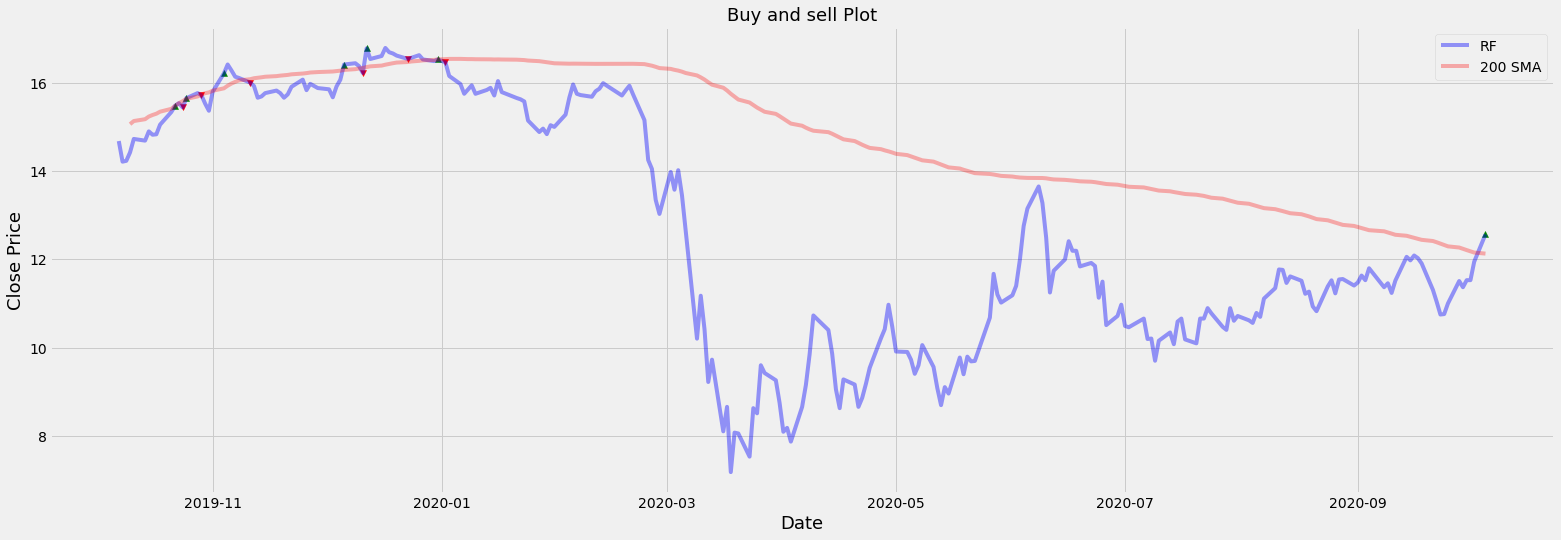

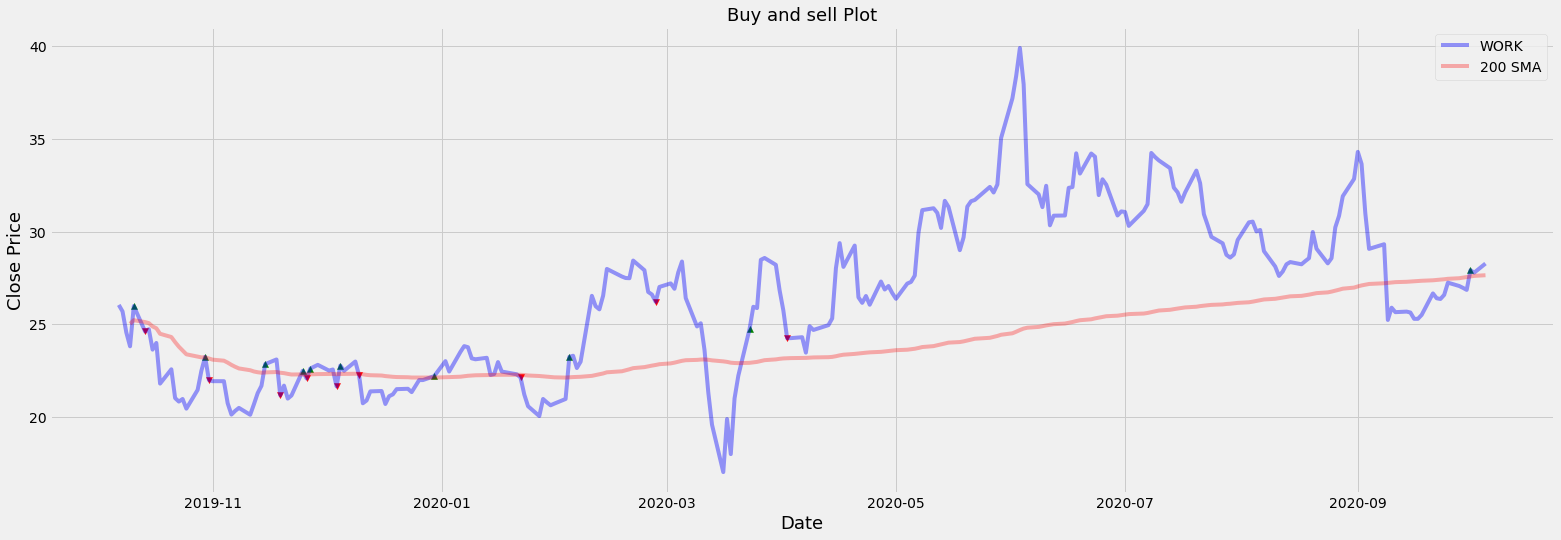

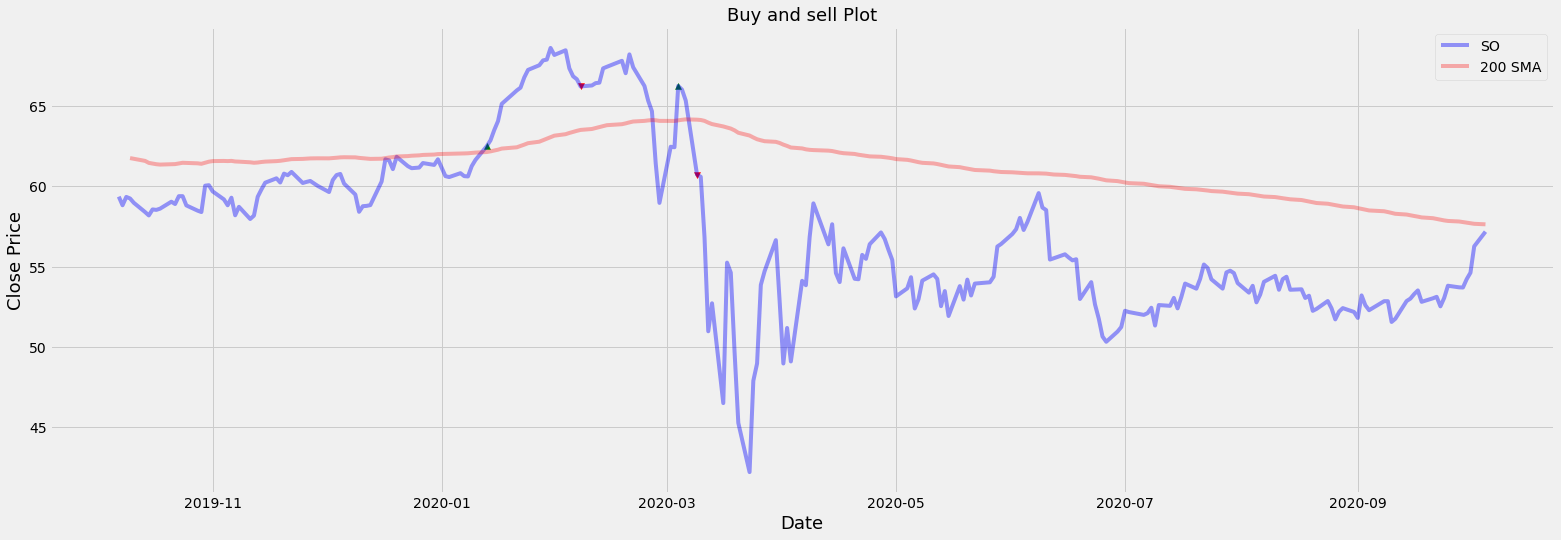

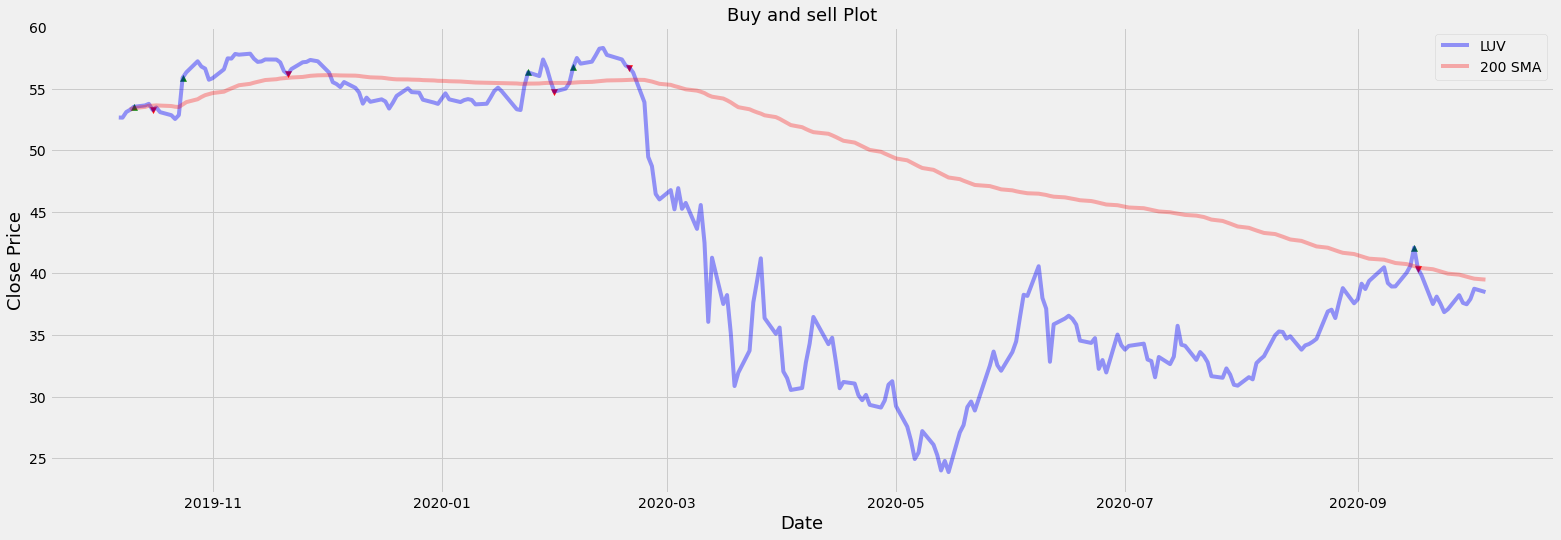

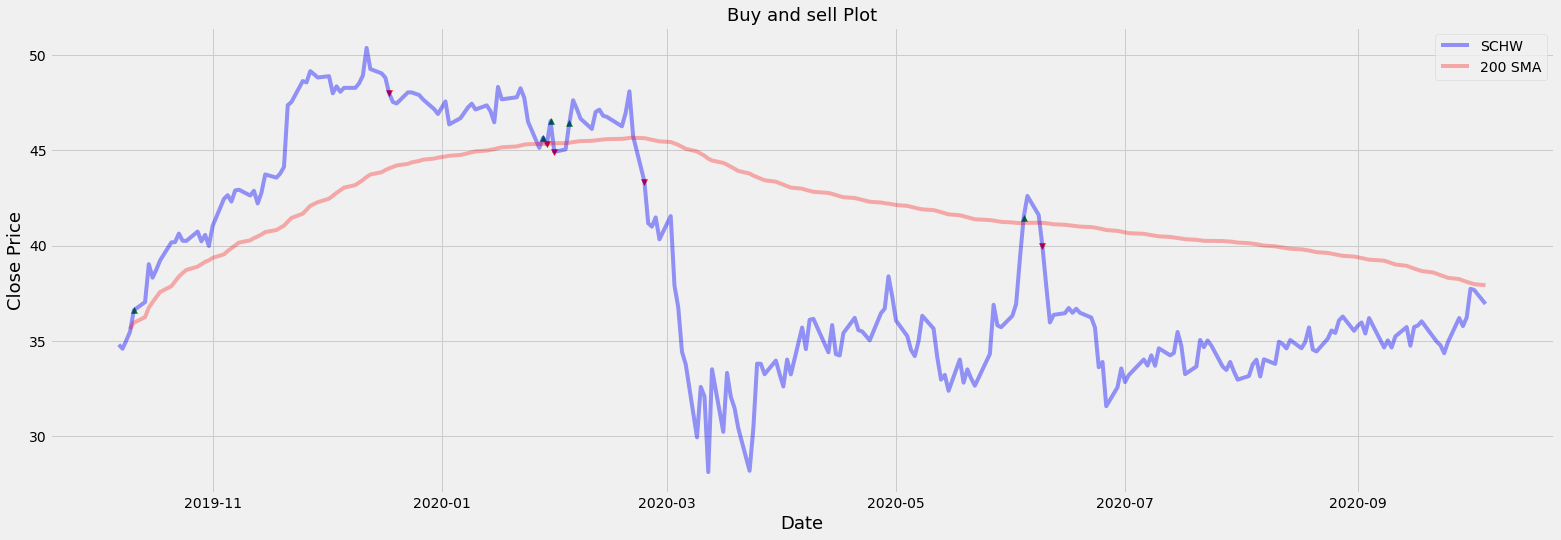

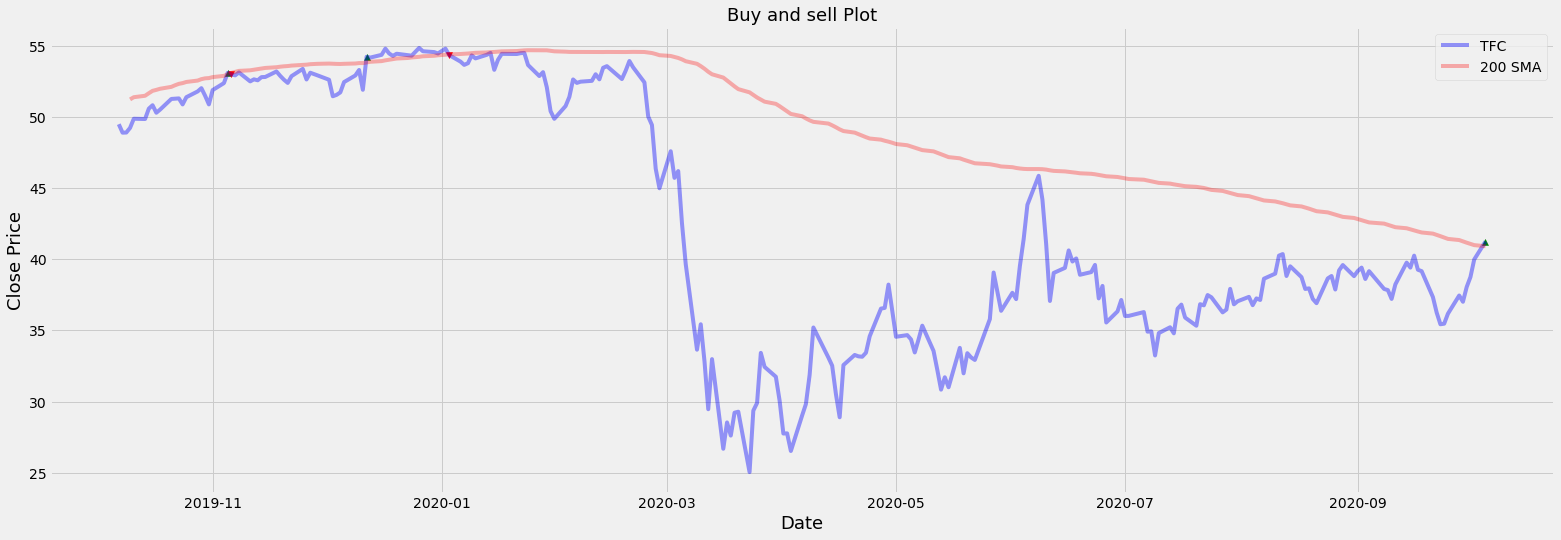

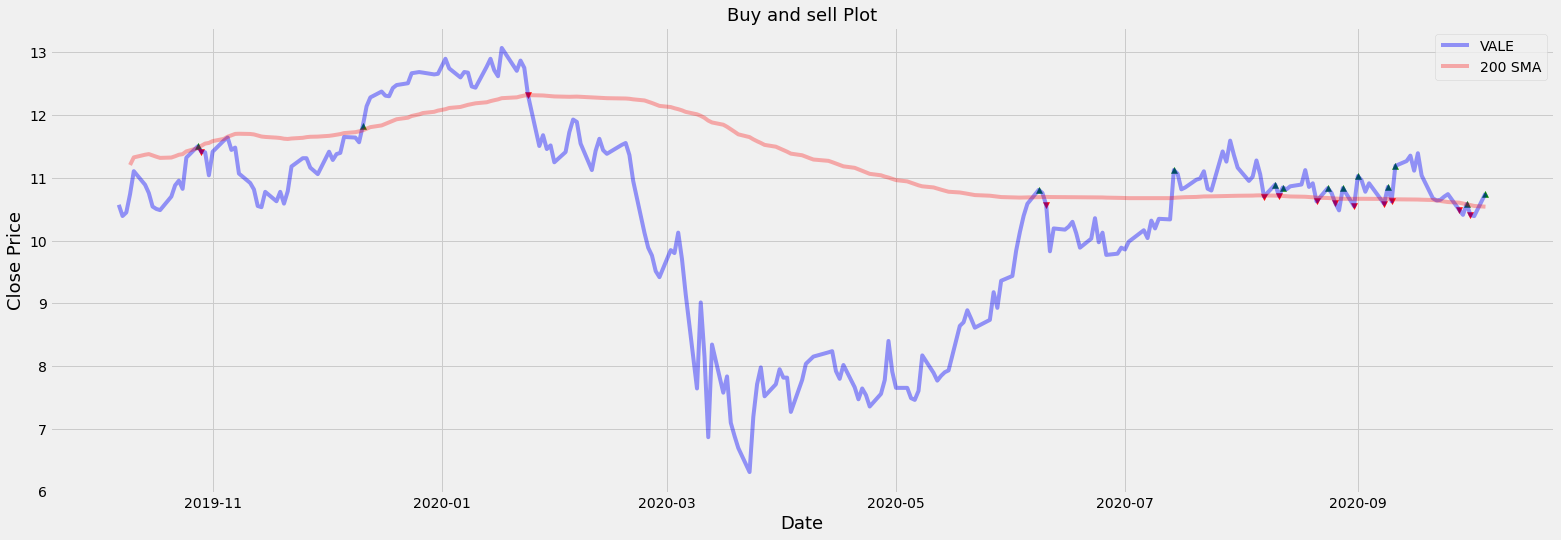

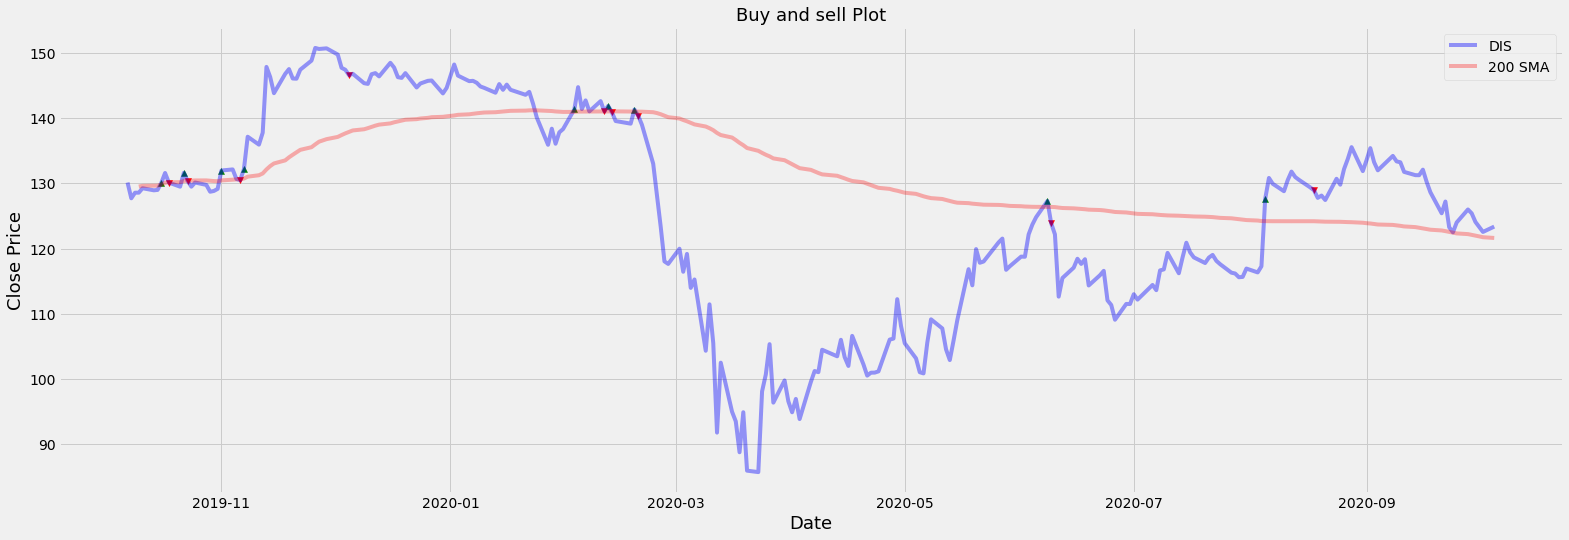

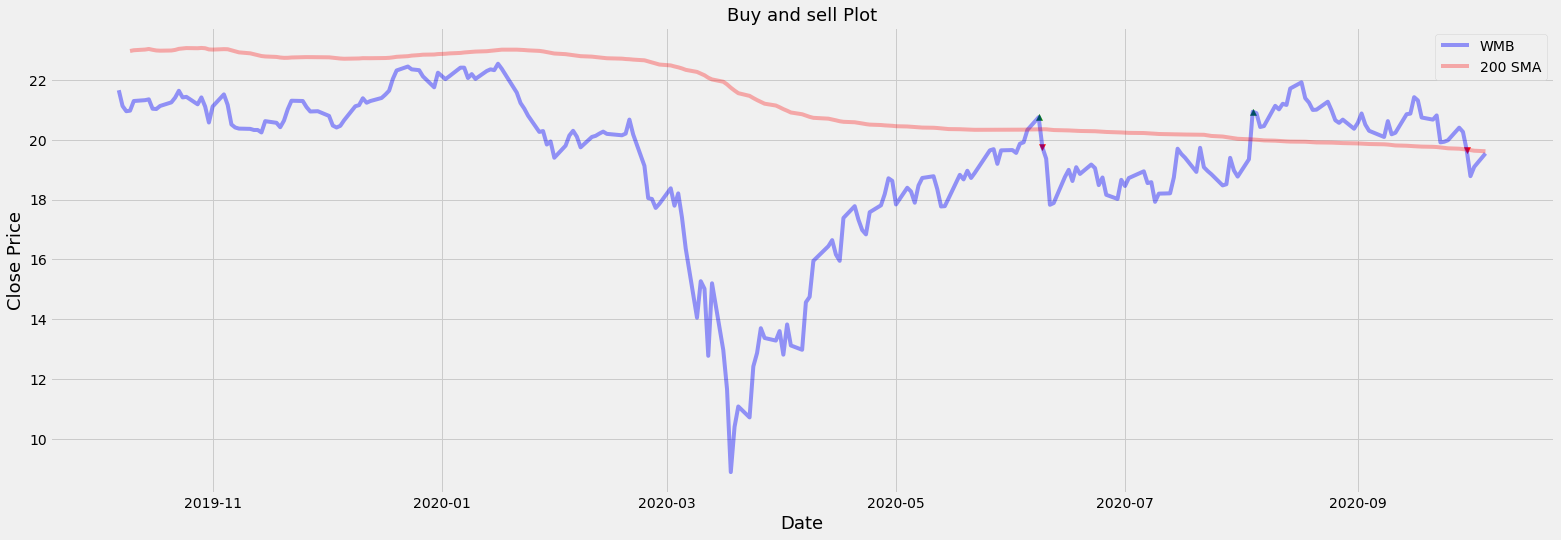

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

stocks = ['BND', 'EMB', 'FITB', 'INO', 'NNOX', 'PDBC', 'PFF', 'TLT', 'WUBA',
          'ATUS', 'BSX', 'BMY', 'KO', 'AG', 'IVZ', 'MGM', 'MS', 'PFE', 'PPL', 
          'RF', 'WORK', 'SO', 'LUV', 'SCHW', 'TFC', 'VALE', 'DIS', 'WMB']

# stocks = ['SPY','DE','MCD','KO','T','TMUS','PFE','UPS','FDX','HD','RVLV',
#           'TDOC','WMT','DIS','KR','BYND','F','GE','GM','PRPL','HSY','MO',
#           'BUD','WHR','PENN','HON','JNJ','PG','MMM','FMC','FRPT','CHWY']

medical = ['MRNA','PFE','KODK','AZN','ABT','ABBV','SRNE','INO','ABUS','UNH',
           'HSTM','ISRG']

becky = ['TGT','CAKE','BBBY','LULU','ULTA','AAPL','SBUX','LVMUY','PINS','PTON',
         'ETSY']

defense = ['BA','LMT','NOC','RTX','GD','KTOS','HEI','BAH','LDOS','HII','TDG',
           'LHX','HWM','BAH']

travel = ['MGM','AAL','UAL','DAL','JETS','LUV','HLT','MAR','WYNN','H','RCL',
          'CCL','MSGS']

energy = ['D','HAL','MRO','USO','XOM','COP','OKE','VLO','XLE','FSLR','BP','OXY',
          'KMI','PSX','APA','MUR','OIS','MTDR','SPWR','JKS','CSIQ','ENPH','DQ']

financial = ['SLV','GLD','BAC','GS','JPM','TLT','USB','WFC','HSBC','DB','XLF',
             'C','RKT','V','DFS','UUP','SFTBY','VFH','CFG','UVE','NMIH','AXP']

tech = ['TSLA','AAPL','AMZN','SNAP','FB','NFLX','WORK','NKLA','EA','BOTZ',
        'HACK','ATVI','ZNGA','MSFT','TWTR','NET','INTC','AMD','DOCU','GOOG',
        'UBER','ZM','CRM','PYPL','SQ','ROP','IBM','MU','ORCL','SPOT',
        'SHOP','SPCE','SHLL','WKHS','BABA','OKTA','TWLO','CSCO','NET','GLUU',
        'SNE','NTDOY','DOCU','NIO','NVDA','LYFT','LOGI']

def handle_tech_analysis(stock):
  today = dt.datetime.now()
  start_date = dt.datetime(today.year-1, today.month, today.day)
  df = web.DataReader(stock, 'yahoo', start=start_date, end=today)
  df['200_SMA'] = df.Close.rolling(200, min_periods=4).mean()

  df['Buy'] = buy_sell_function(df)[0]
  df['Sell'] = buy_sell_function(df)[1]

  # Visually show the stock buy and sell signals
  plt.figure(figsize=(24, 8))
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel('Close Price', fontsize=18)
  plt.title('Buy and sell Plot', fontsize=18)
  plt.plot(df['Adj Close'], label=stock, color='blue', alpha=.4)
  plt.plot(df['200_SMA'], label='200 SMA', color='red', alpha=.3)
  plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
  plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha= 1)
  plt.legend()
  plt.show()

def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False
  flag_3_negative_days = False
  counter = 0
  wait_for_reset = False

  for i in range(0, len(data)):
    if (data['Close'][i] < data['Close'][i - 1]):
        counter = counter + 1
        if (counter == 4):
            counter = 0
            flag_3_negative_days = True
            wait_for_reset = True
    else:
      counter = 0
      flag_3_negative_days = False

    if data['Adj Close'][i] > data['200_SMA'][i] and flag_long == False and wait_for_reset == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and (data['Adj Close'][i] < data['200_SMA'][i] or flag_3_negative_days == True):
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    elif wait_for_reset == True and data['Adj Close'][i] < data['200_SMA'][i]:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
      wait_for_reset = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

for stock in stocks:
    handle_tech_analysis(stock) 